# SUPPORT VECTOR MACHINE
Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset
Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.
Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [4]:
df.shape

(2000, 26)

In [5]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [6]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)

In [7]:
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broad       pink    tapering  ...    partial      brown   
1         crowded    narrow  chocolate   enlarging  ...  universal      brown   
2         crowded     broad     purple    tapering  ...  universal     yellow   
3           close     broad     orange   enlarging  ...    partial     yellow   
4         crowded    narrow     orange   enlarging  ...  universal      white   
...           ...       ...        ...         ...  ...        ...        ...   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1996      distant    narrow        red    tapering  ...    partial      white   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   
1999        close    narrow     purple   enlarging  ...    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
1995         one     flaring            purple   abundant   leaves  poisonous   
1996         one        zone            yellow   numerous    waste  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   
1999         two       large             white   numerous    urban  poisonous   

     stalk_height cap_diameter  
0       14.276173     5.054983  
1        3.952715    19.068319  
2        9.054265     7.205884  
3        5.226499    20.932692  
4       14.037532    12.545245  
...           ...          ...  
1995     5.877891    17.464145  
1996     6.500840    13.501957  
1997    13.558064    11.270020  
1998    11.092703     8.423199  
1999    13.066414    21.056642  

[2000 rows x 25 columns]

In [8]:
df.info

<bound method DataFrame.info of      cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996    False
1997     True
1998     True
1999    False
Length: 2000, dtype: bool

In [10]:
df.duplicated().sum()

1024

In [11]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [12]:
df["bruises"].value_counts()

bruises
yes    1023
no      977
Name: count, dtype: int64

In [13]:
df["odor"].value_counts()

odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64

In [14]:
plt.figure(figsize= (10,9))
plt.hist(df['stalk_height'], bins = 20, color = 'skyblue', edgecolor= 'black')
plt.title("Histogram ")
plt.xlabel("stalk heaight")
plt.ylabel("frequency")
plt.show()

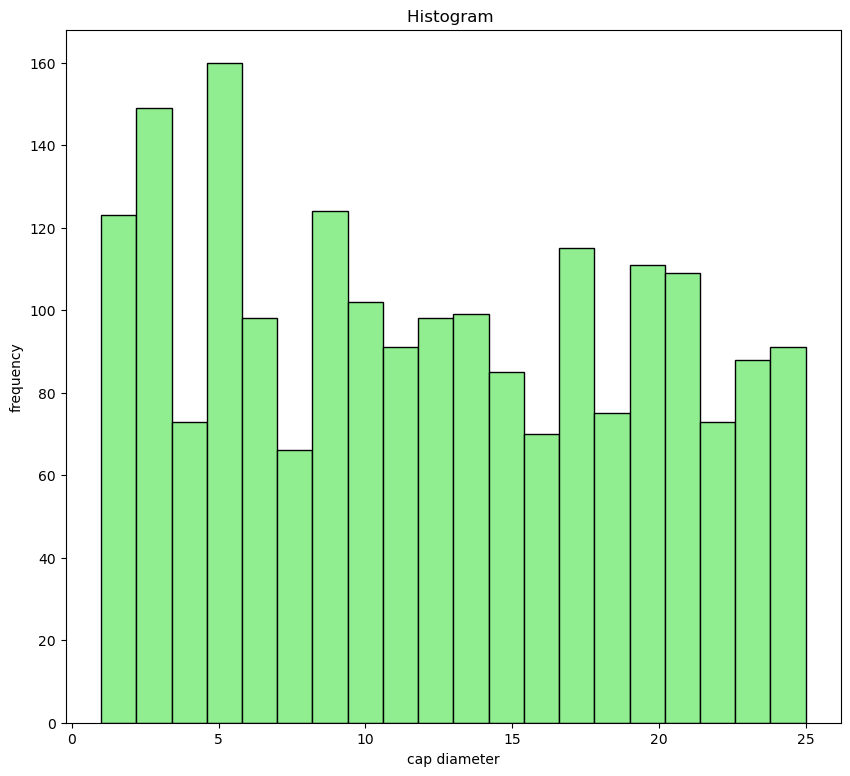

In [15]:
plt.figure(figsize= (10,9))
plt.hist(df['cap_diameter'], bins = 20, color = 'lightgreen', edgecolor= 'black')
plt.title("Histogram ")
plt.xlabel("cap diameter")
plt.ylabel("frequency")
plt.show()

In [16]:
plt.figure(figsize= (10,15))
sns.boxplot(x = 'class', y = 'stalk_height', data = df)
plt.title("boxplot")
plt.show()

In [17]:
plt.figure(figsize= (10,15))
sns.boxplot(x = 'class', y = 'cap_diameter', data = df)
plt.title("boxplot")
plt.show()


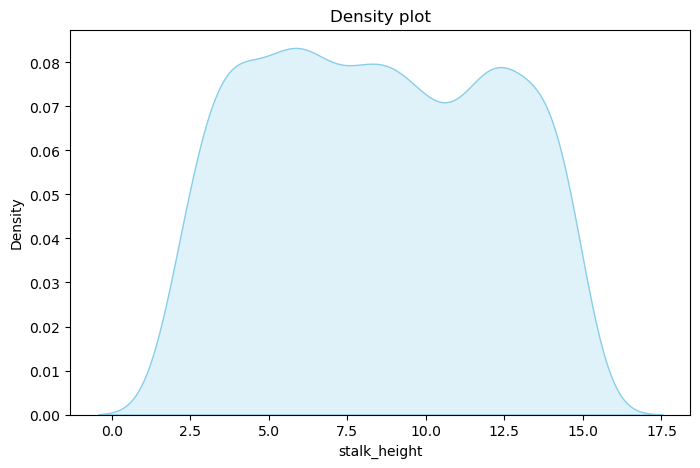

In [18]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='stalk_height', fill=True, color='skyblue')
plt.title("Density plot")
plt.show()

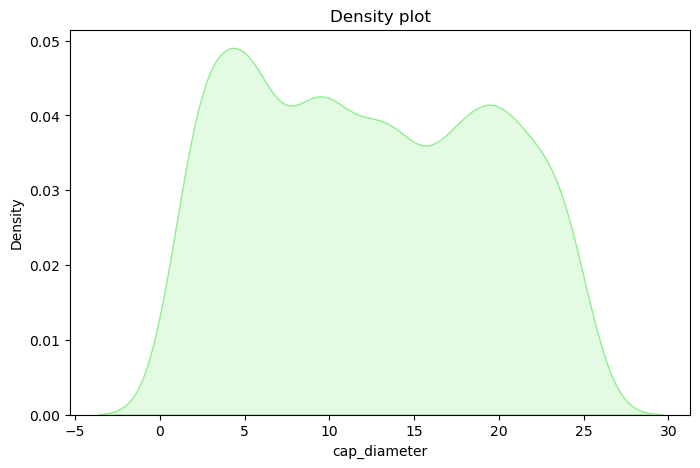

In [19]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='cap_diameter', fill=True, color='lightgreen')
plt.title("Density plot")
plt.show()

## 3.	Investigate feature correlations to discern relationships within the data.
Since most of your features are categorical, we first need to encode them numerically to calculate correlations

## Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [20]:
# as we have duplicates values we should drop the duplicates values from the data set
print("before datatest:", df.shape)
df.drop_duplicates(inplace = True)
print("after droping duplicates:",df.shape)

before datatest: (2000, 25)
after droping duplicates: (976, 25)


In [21]:
# lets check on which valuesd do we need use one hot encoding and on which column we should use label encoding 
data = df.select_dtypes(include = 'object').columns
for col in data:
    print(col, '=', df[col].nunique())

cap_shape = 5
cap_surface = 4
cap_color = 9
bruises = 2
odor = 9
gill_attachment = 4
gill_spacing = 3
gill_size = 2
gill_color = 12
stalk_shape = 2
stalk_root = 7
stalk_surface_above_ring = 4
stalk_surface_below_ring = 4
stalk_color_above_ring = 9
stalk_color_below_ring = 9
veil_type = 2
veil_color = 4
ring_number = 3
ring_type = 8
spore_print_color = 9
population = 6
habitat = 7
class = 2


In [22]:
x = df.drop('class', axis = 1)
y = df['class']

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [24]:
data = x.select_dtypes(include = 'object').columns

In [25]:
x = pd.get_dummies(x, columns = data)

In [26]:
x

stalk_height  cap_diameter  cap_shape_bell  cap_shape_conical  \
0        14.276173      5.054983           False              False   
1         3.952715     19.068319           False              False   
2         9.054265      7.205884           False              False   
3         5.226499     20.932692            True              False   
4        14.037532     12.545245           False              False   
...            ...           ...             ...                ...   
1985     13.020616      9.993008           False               True   
1988      3.751597     18.868135            True              False   
1989     13.134058     15.740028           False              False   
1996      6.500840     13.501957           False              False   
1999     13.066414     21.056642           False              False   

      cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_fibrous  \
0                False           False              True                False   
1                False           False              True                 True   
2                False            True             False                False   
3                False           False             False                False   
4                False            True             False                False   
...                ...             ...               ...                  ...   
1985             False           False             False                False   
1988             False           False             False                False   
1989             False           False              True                False   
1996             False           False              True                False   
1999              True           False             False                False   

      cap_surface_grooves  cap_surface_scaly  ...  population_scattered  \
0                   False               True  ...                 False   
1                   False              False  ...                 False   
2                    True              False  ...                 False   
3                   False               True  ...                 False   
4                   False              False  ...                 False   
...                   ...                ...  ...                   ...   
1985                 True              False  ...                 False   
1988                 True              False  ...                 False   
1989                False              False  ...                 False   
1996                False               True  ...                 False   
1999                False               True  ...                 False   

      population_several  population_solitary  habitat_grasses  \
0                  False                False            False   
1                  False                False            False   
2                  False                False            False   
3                  False                False             True   
4                  False                False            False   
...                  ...                  ...              ...   
1985               False                False            False   
1988               False                False             True   
1989               False                False             True   
1996               False                False            False   
1999               False                False            False   

      habitat_leaves  habitat_meadows  habitat_paths  habitat_urban  \
0              False            False          False          False   
1              False            False          False          False   
2              False            False          False          False   
3              False            False          False          False   
4              False            False          False           True   
...              ...              ...            ...        

In [27]:
y 

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols= ['stalk_height','cap_diameter']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])
x

stalk_height  cap_diameter  cap_shape_bell  cap_shape_conical  \
0         1.553976     -1.080201           False              False   
1        -1.235285      0.926435           False              False   
2         0.143086     -0.772204           False              False   
3        -0.891126      1.193403            True              False   
4         1.489498     -0.007635           False              False   
...            ...           ...             ...                ...   
1985      1.214741     -0.373102           False               True   
1988     -1.289624      0.897769            True              False   
1989      1.245391      0.449841           False              False   
1996     -0.546816      0.129361           False              False   
1999      1.227115      1.211152           False              False   

      cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_fibrous  \
0                False           False              True                False   
1                False           False              True                 True   
2                False            True             False                False   
3                False           False             False                False   
4                False            True             False                False   
...                ...             ...               ...                  ...   
1985             False           False             False                False   
1988             False           False             False                False   
1989             False           False              True                False   
1996             False           False              True                False   
1999              True           False             False                False   

      cap_surface_grooves  cap_surface_scaly  ...  population_scattered  \
0                   False               True  ...                 False   
1                   False              False  ...                 False   
2                    True              False  ...                 False   
3                   False               True  ...                 False   
4                   False              False  ...                 False   
...                   ...                ...  ...                   ...   
1985                 True              False  ...                 False   
1988                 True              False  ...                 False   
1989                False              False  ...                 False   
1996                False               True  ...                 False   
1999                False               True  ...                 False   

      population_several  population_solitary  habitat_grasses  \
0                  False                False            False   
1                  False                False            False   
2                  False                False            False   
3                  False                False             True   
4                  False                False            False   
...                  ...                  ...              ...   
1985               False                False            False   
1988               False                False             True   
1989               False                False             True   
1996               False                False            False   
1999               False                False            False   

      habitat_leaves  habitat_meadows  habitat_paths  habitat_urban  \
0              False            False          False          False   
1              False            False          False          False   
2              False            False          False          False   
3              False            False          False          False   
4              False            False          False           True   
...              ...              ...            ...        

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 42, stratify = y)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 126)
(196, 126)
(780,)
(196,)


In [31]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[286 494]
[ 72 124]


## Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


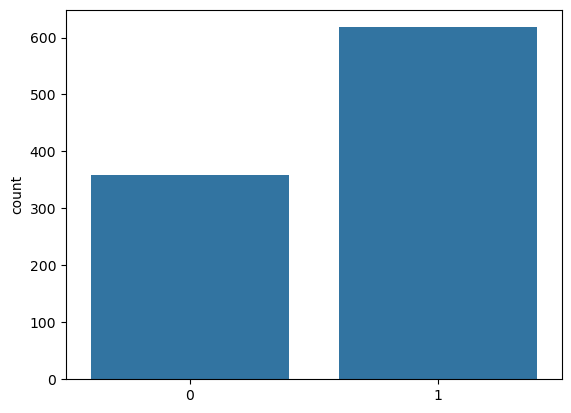

In [32]:
sns.countplot(x=y)
plt.show()

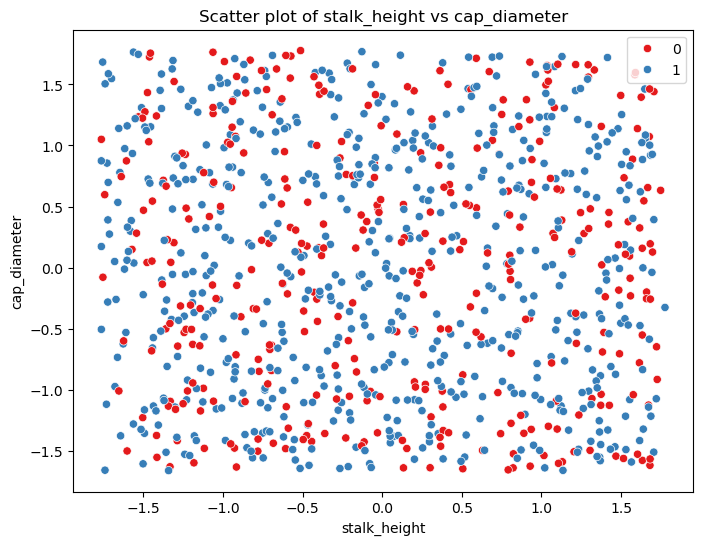

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x['stalk_height'], y=x['cap_diameter'], hue=y, palette='Set1')
plt.title("Scatter plot of stalk_height vs cap_diameter")
plt.show()


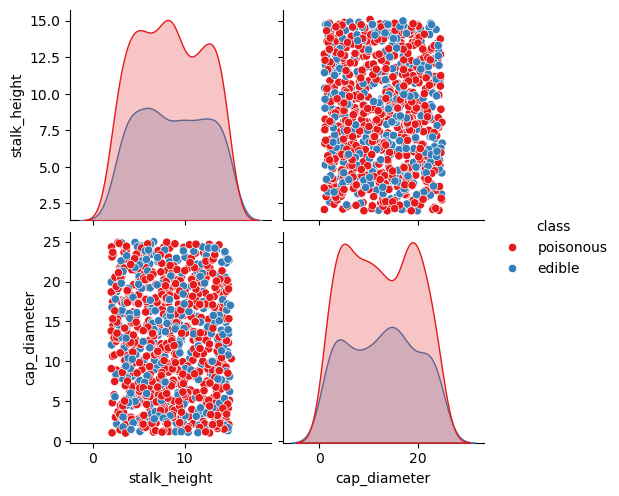

In [34]:
numeric_cols = ['stalk_height', 'cap_diameter']
sns.pairplot(df[numeric_cols + ['class']], hue='class', palette='Set1')
plt.show()


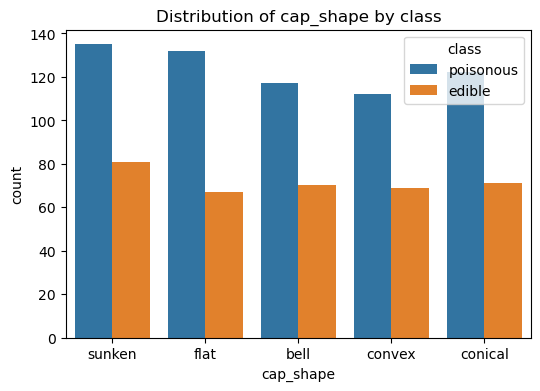

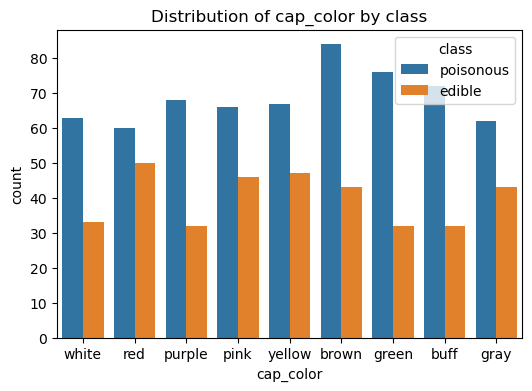

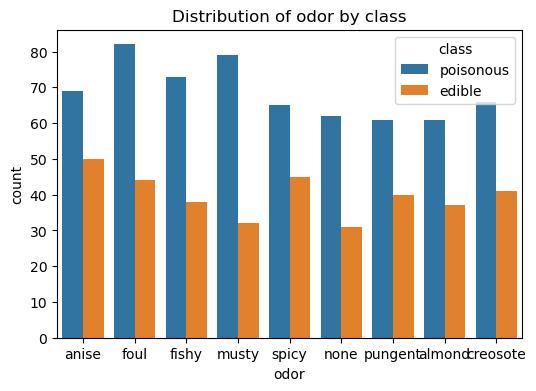

In [35]:
for col in ['cap_shape', 'cap_color', 'odor']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f"Distribution of {col} by class")
    plt.show()


## Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [68]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state= 42,)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("accuarcy score:", accuracy_score(y_test,y_pred))
print("precision score:", precision_score(y_test,y_pred))
print("recall score", recall_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



accuarcy score: 0.5918367346938775
precision score: 0.6392405063291139
recall score 0.8145161290322581

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.21      0.27        72
           1       0.64      0.81      0.72       124

    accuracy                           0.59       196
   macro avg       0.52      0.51      0.49       196
weighted avg       0.55      0.59      0.55       196



## Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.

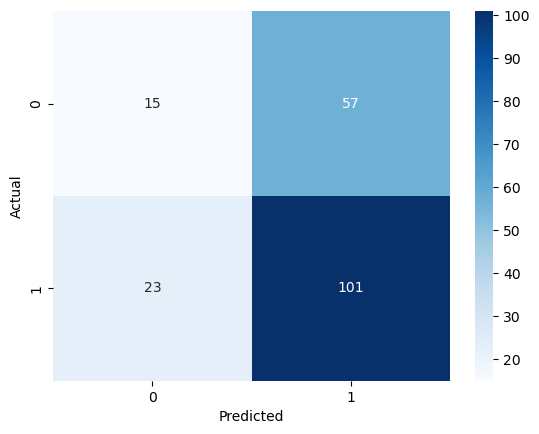

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],          
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search =GridSearchCV(svm, param_grid, cv = 5, n_jobs = -1, scoring= 'accuracy')

grid_search.fit(x_train,y_train)

print("best parameters :", grid_search.best_params_)
print("best score :", grid_search.best_score_)

best parameters : {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
best score : 0.6333333333333333


In [78]:
best_model = grid_search.best_estimator_
y_pred_best= best_model.predict(x_test)

In [79]:
y_pred_best

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1 Score: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

## Answer:

(1)- Kernel Comparison:
Linear: Accuracy ~0.59, simple, struggles with non-linear patterns.
Polynomial: Captures interactions, may overfit high-dimensional data.
RBF: Accuracy ~0.63, best F1 for minority class, handles non-linear boundaries well.

(2)- SVM Strengths & Weaknesses:
Strengths: Works well for binary classification, handles high-dimensional data, captures non-linear relationships.
Weaknesses: Sensitive to class imbalance, sparse features from one-hot encoding can slow training, numeric scaling important.

(3)- Practical Implications:
Useful in medical diagnosis, spam detection, image recognition.
Best for small to medium datasets; requires proper preprocessing for imbalanced or high-dimensional data.